## Note:
Did not do the frame diagnostics per AOR since we got the correction stacks from Bill Glaccum already.

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

import os

from astropy.stats import sigma_clip

from tqdm import tnrange

import warnings
warnings.simplefilter("ignore", UserWarning)

%matplotlib inline

In [2]:
def load_data(path):
    '''
    Retrieve full data obtained from photometry extraction

    Parameters
    ----------
    path: string
        path to full data text file
        
    Returns
    -------
    aperture_sum     : 1D array
        Flux extracted for each frame
    aperture_sum_err : 1D array
        Error on flux extracted for each frame
    time             : 1D array
        Time stamp for each frame
    xo               : 1D array
        X-coordinate of the centroid for each frame
    yo               : 1D array
        Y-coordinate of the centroid for each frame             
    xw               : 1D array
        X-width of the target's PSF for each frame              
    yw               : 1D array
        Y-width of the target's PSF for each frame                 
    bg_flux          : 1D array
        Background flux measured for each frame         
    bg_err           : 1D array
        Error on background flux measured for each frame           
    '''
    
    flux     = np.loadtxt(path, usecols=[0], skiprows=1)
    flux_err = np.loadtxt(path, usecols=[1], skiprows=1)
    time     = np.loadtxt(path, usecols=[2], skiprows=1)
    xo       = np.loadtxt(path, usecols=[3], skiprows=1)
    yo       = np.loadtxt(path, usecols=[4], skiprows=1)
    xw       = np.loadtxt(path, usecols=[5], skiprows=1)
    yw       = np.loadtxt(path, usecols=[6], skiprows=1)
    bg_flux  = np.loadtxt(path, usecols=[7], skiprows=1)
    bg_err   = np.loadtxt(path, usecols=[8], skiprows=1)
    return flux, flux_err, time, xo, yo, xw, yw, bg_flux, bg_err

In [3]:
def sigclip(data, sig=4, ite=5):
    new_data = sigma_clip(data, sigma = sig, iters = ite)
    return new_data

In [6]:
# path to data 
path = '/volumes/Seagate Expansion Drive/Research/XO-3b/ch1/Analysis/3umFixedCenterCircular6_25/ch1_datacube_full_AORs464.dat'
# load data
flux, flux_err, time, xo, yo, xw, yw, bg_flux, bg_err = load_data(path)

# basics
nframe = len(flux)
ncubes = int(nframe/64)

# get median to normalize per datacube
flux_med      = np.ma.median(np.ma.masked_invalid(flux.reshape((ncubes,64))), axis=1)
flux_err_med  = np.ma.median(np.ma.masked_invalid(flux_err.reshape((ncubes,64))), axis=1)
time_med      = np.ma.median(np.ma.masked_invalid(time.reshape((ncubes,64))), axis=1)
xo_med        = np.ma.median(np.ma.masked_invalid(xo.reshape((ncubes,64))), axis=1)
yo_med        = np.ma.median(np.ma.masked_invalid(yo.reshape((ncubes,64))), axis=1)
xw_med        = np.ma.median(np.ma.masked_invalid(xw.reshape((ncubes,64))), axis=1)
yw_med        = np.ma.median(np.ma.masked_invalid(yw.reshape((ncubes,64))), axis=1)
bg_flux_med   = np.ma.median(np.ma.masked_invalid(bg_flux.reshape((ncubes,64))), axis=1)
bg_err_med    = np.ma.median(np.ma.masked_invalid(bg_err.reshape((ncubes,64))), axis=1)

# normalized data
flux_norm     = flux/np.array(np.repeat(flux_med, 64))
flux_err_norm = flux_err/np.array(np.repeat(flux_err_med, 64))
time_norm     = time/np.array(np.repeat(time_med, 64))
xo_norm       = xo/np.array(np.repeat(xo_med, 64))
yo_norm       = yo/np.array(np.repeat(yo_med, 64))
xw_norm       = xw/np.array(np.repeat(xw_med, 64))
yw_norm       = yw/np.array(np.repeat(yw_med, 64))
bg_flux_norm  = bg_flux/np.array(np.repeat(bg_flux_med, 64))
bg_err_norm   = bg_err/np.array(np.repeat(bg_err_med, 64))

# sigma clip the normalized data
flux_clip     = sigclip(flux_norm)
flux_err_clip = sigclip(flux_err_norm)
time_clip     = sigclip(time_norm)
xo_clip       = sigclip(xo_norm)
yo_clip       = sigclip(yo_norm)
xw_clip       = sigclip(xw_norm)
yw_clip       = sigclip(yw_norm)
bg_flux_clip  = sigclip(bg_flux_norm)
bg_err_clip   = sigclip(bg_err_norm)

# get median per frame ID
flux_frame     = np.ma.median(np.ma.masked_invalid(flux_norm.reshape((ncubes,64))), axis=0)
flux_err_frame = np.ma.median(np.ma.masked_invalid(flux_err_norm.reshape((ncubes,64))), axis=0)
time_frame     = np.ma.median(np.ma.masked_invalid(time_norm.reshape((ncubes,64))), axis=0)
xo_frame       = np.ma.median(np.ma.masked_invalid(xo_norm.reshape((ncubes,64))), axis=0)
yo_frame       = np.ma.median(np.ma.masked_invalid(yo_norm.reshape((ncubes,64))), axis=0)
xw_frame       = np.ma.median(np.ma.masked_invalid(xw_norm.reshape((ncubes,64))), axis=0)
yw_frame       = np.ma.median(np.ma.masked_invalid(yw_norm.reshape((ncubes,64))), axis=0)
bg_flux_frame  = np.ma.median(np.ma.masked_invalid(bg_flux_norm.reshape((ncubes,64))), axis=0) 
bg_err_frame   = np.ma.median(np.ma.masked_invalid(bg_err_norm.reshape((ncubes,64))), axis=0)

# get median per frame ID using sigma clipped data
flux_frame     = np.ma.median(flux_clip.reshape((ncubes,64)), axis=0)
flux_err_frame = np.ma.median(flux_err_clip.reshape((ncubes,64)), axis=0)
time_frame     = np.ma.median(time_clip.reshape((ncubes,64)), axis=0)
xo_frame       = np.ma.median(xo_clip.reshape((ncubes,64)), axis=0)
yo_frame       = np.ma.median(yo_clip.reshape((ncubes,64)), axis=0)
xw_frame       = np.ma.median(xw_clip.reshape((ncubes,64)), axis=0)
yw_frame       = np.ma.median(yw_clip.reshape((ncubes,64)), axis=0)
bg_flux_frame  = np.ma.median(bg_flux_clip.reshape((ncubes,64)), axis=0) 
bg_err_frame   = np.ma.median(bg_err_clip.reshape((ncubes,64)), axis=0)

/Users/ldang/anaconda3/lib/python3.6/site-packages/astropy/stats/sigma_clipping.py:158: RuntimeWarning: invalid value encountered in greater
  _filtered_data.mask |= _filtered_data > max_value
/Users/ldang/anaconda3/lib/python3.6/site-packages/astropy/stats/sigma_clipping.py:159: RuntimeWarning: invalid value encountered in less
  _filtered_data.mask |= _filtered_data < min_value


In [7]:
# getting median and std for each quantity using the 64 averages
meanflux,    sigmaflux    = np.ma.median(flux_frame), np.ma.std(flux_frame)
meanbg_flux, sigmabg_flux = np.ma.median(bg_flux_frame), np.ma.std(bg_flux_frame)
meanxo,      sigmaxo      = np.ma.median(xo_frame), np.ma.std(xo_frame)
meanyo,      sigmayo      = np.ma.median(yo_frame), np.ma.std(yo_frame)
meanxw,      sigmaxw      = np.ma.median(xw_frame), np.ma.std(xw_frame)
meanyw,      sigmayw      = np.ma.median(yw_frame), np.ma.std(yw_frame)

# standard deviation with sigma clipping
flag = False
while(flag == False):
    index = np.where(np.fabs(flux_frame-meanflux)>4*sigmaflux)
    np.append(index, np.where(np.fabs(flux_frame-meanflux)>4*sigmaflux))
    sigmaflux2 = np.std(np.delete(flux_frame, index))
    flag = (sigmaflux2 == sigmaflux)
    sigmaflux = sigmaflux2
    
flag = False
while(flag == False):
    index = np.where(np.fabs(bg_flux_frame-meanbg_flux)>4*sigmabg_flux)
    np.append(index, np.where(np.fabs(bg_flux_frame-meanbg_flux)>4*sigmabg_flux))
    sigmabg_flux2 = np.std(np.delete(bg_flux_frame, index))
    flag = (sigmabg_flux2 == sigmabg_flux)
    sigmabg_flux = sigmabg_flux2
    
flag = False
while(flag == False):
    index = np.where(np.fabs(xo_frame-meanxo)>4*sigmaxo)
    np.append(index, np.where(np.fabs(xo_frame-meanxo)>4*sigmaxo))
    sigmaxo2 = np.std(np.delete(xo_frame, index))
    flag = (sigmaxo2 == sigmaxo)
    sigmaxo = sigmaxo2
    
flag = False
while(flag == False):
    index = np.where(np.fabs(yo_frame-meanyo)>4*sigmayo)
    np.append(index, np.where(np.fabs(yo_frame-meanyo)>4*sigmayo))
    sigmayo2 = np.std(np.delete(yo_frame, index))
    flag = (sigmayo2 == sigmayo)
    sigmayo = sigmayo2
    
flag = False
while(flag == False):
    index = np.where(np.fabs(xw_frame-meanxw)>4*sigmaxw)
    np.append(index, np.where(np.fabs(xw_frame-meanxw)>4*sigmaxw))
    sigmaxw2 = np.std(np.delete(xw_frame, index))
    flag = (sigmaxw2 == sigmaxw)
    sigmaxw = sigmaxw2
    
flag = False
while(flag == False):
    index = np.where(np.fabs(yw_frame-meanyw)>4*sigmayw)
    np.append(index, np.where(np.fabs(yw_frame-meanyw)>4*sigmayw))
    sigmayw2 = np.std(np.delete(yw_frame, index))
    flag = (sigmayw2 == sigmayw)
    sigmayw = sigmayw2

In [8]:
# flagging the outliers for each quantity
flag_flux    = np.where(np.fabs(flux_frame-meanflux)>4*sigmaflux)[0].tolist()
flag_bg_flux = np.where(np.fabs(bg_flux_frame-meanbg_flux)>4*sigmabg_flux)[0].tolist()
flag_xo      = np.where(np.fabs(xo_frame-meanxo)>4*sigmaxo)[0].tolist()
flag_yo      = np.where(np.fabs(yo_frame-meanyo)>4*sigmayo)[0].tolist()
flag_xw      = np.where(np.fabs(xw_frame-meanxw)>4*sigmaxw)[0].tolist()
flag_yw      = np.where(np.fabs(yw_frame-meanyw)>4*sigmayw)[0].tolist()

# blue flags
flag_blue    = np.unique(np.concatenate((flag_flux,flag_bg_flux, flag_xo, flag_yo, flag_xw, flag_yw))).astype(int)
flag_blue2   = np.setdiff1d(flag_blue, flag_flux).tolist()

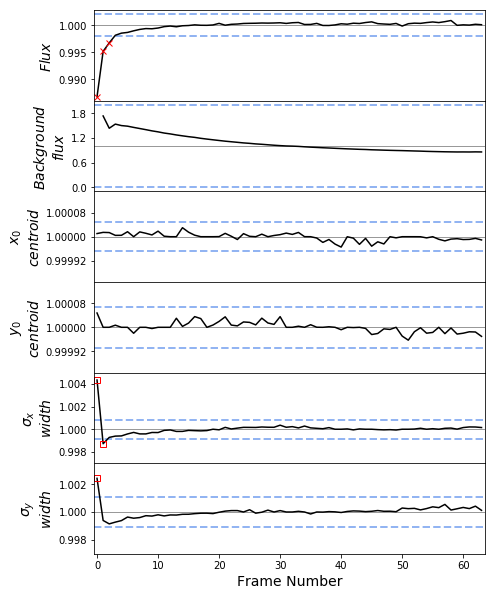

In [10]:
nb = np.arange(64)
fig, axes = plt.subplots(ncols=1, nrows=6, sharex=True, figsize=(7,10))

axes[0].axhline(y=1, color='k', alpha=0.4, linewidth=1)
axes[1].axhline(y=1, color='k', alpha=0.4, linewidth=1)
axes[2].axhline(y=1, color='k', alpha=0.4, linewidth=1)
axes[3].axhline(y=1, color='k', alpha=0.4, linewidth=1)
axes[4].axhline(y=1, color='k', alpha=0.4, linewidth=1)
axes[5].axhline(y=1, color='k', alpha=0.4, linewidth=1)

axes[0].axhline(y= 1 + 4*sigmaflux , color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')
axes[1].axhline(y= 1 + 4*sigmabg_flux, color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')
axes[2].axhline(y= 1 + 4*sigmaxo, color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')
axes[3].axhline(y= 1 + 4*sigmayo, color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')
axes[4].axhline(y= 1 + 4*sigmaxw, color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')
axes[5].axhline(y= 1 + 4*sigmayw, color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')

axes[0].axhline(y= 1 - 4*sigmaflux , color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')
axes[1].axhline(y= 1 - 4*sigmabg_flux, color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')
axes[2].axhline(y= 1 - 4*sigmaxo, color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')
axes[3].axhline(y= 1 - 4*sigmayo, color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')
axes[4].axhline(y= 1 - 4*sigmaxw, color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')
axes[5].axhline(y= 1 - 4*sigmayw, color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')

axes[0].plot(nb, flux_frame   , 'k', mec ='g', marker='s', markevery = flag_blue2,fillstyle='none')
axes[0].plot(nb[flag_flux], flux_frame[flag_flux], 'rx')
axes[1].plot(nb, bg_flux_frame, 'k', mec ='r', marker='s', markevery = flag_bg_flux,fillstyle='none')
axes[2].plot(nb, xo_frame, 'k', mec ='r', marker='s', markevery=flag_xo,fillstyle='none')
axes[3].plot(nb, yo_frame, 'k', mec ='r', marker='s', markevery=flag_yo,fillstyle='none')
axes[4].plot(nb, xw_frame, 'k', mec ='r', marker='s', markevery=flag_xw,fillstyle='none')
axes[5].plot(nb, yw_frame, 'k', mec ='r', marker='s', markevery=flag_yw,fillstyle='none')

#axes[0].set_ylim(0.9925, 1.001)
#axes[1].set_ylim(0.64,1.45)
axes[2].set_ylim(0.99985, 1.00015)
axes[3].set_ylim(0.99985, 1.00015)
axes[4].set_ylim(0.997, 1.005)
axes[5].set_ylim(0.997, 1.0035)

axes[0].yaxis.set_major_locator(MaxNLocator(4,prune='both'))
axes[1].yaxis.set_major_locator(MaxNLocator(4,prune='both'))
axes[2].yaxis.set_major_locator(MaxNLocator(4,prune='both'))
axes[3].yaxis.set_major_locator(MaxNLocator(4,prune='both'))
axes[4].yaxis.set_major_locator(MaxNLocator(4,prune='both'))
axes[5].yaxis.set_major_locator(MaxNLocator(4,prune='both'))

axes[0].set_ylabel('$Flux$', fontsize=14)
axes[1].set_ylabel('$Background$\n$flux$', fontsize=14, multialignment='center')
axes[2].set_ylabel('$x_0$\n$centroid$', fontsize=14, multialignment='center')
axes[3].set_ylabel('$y_0$\n$centroid$', fontsize=14, multialignment='center')
axes[4].set_ylabel('$\sigma _x$\n$width$', fontsize=14, multialignment='center')
axes[5].set_ylabel('$\sigma _y$\n$width$', fontsize=14, multialignment='center')

axes[0].ticklabel_format(useOffset=False)
axes[1].ticklabel_format(useOffset=False)
axes[2].ticklabel_format(useOffset=False)
axes[3].ticklabel_format(useOffset=False)
axes[4].ticklabel_format(useOffset=False)
axes[5].ticklabel_format(useOffset=False)

#axes[0].plot(nb,flux,color='k', mec ='b', marker='s', markevery=[0],fillstyle='none')

axes[5].set_xlim(-0.5,63.5)
axes[5].set_xlabel('Frame Number', fontsize=14)
fig.subplots_adjust(hspace=0)

# path to save figure
path_plot = '/volumes/Seagate Expansion Drive/Research/XO-3b/ch1/Analysis/3umFixedCenterCircular6_25/frame_diagnostics.pdf'
fig.savefig(path_plot, bbox_inches='tight')

In [11]:
# save data that makes up this plot

save_path = '/volumes/Seagate Expansion Drive/Research/XO-3b/ch1/Analysis/3umFixedCenterCircular6_25/frame_diagnostics.dat'

save_data = np.c_[nb, flux_frame, bg_flux_frame, xo_frame, yo_frame, xw_frame, yw_frame]
save_head = 'Frame_ID, Flux, Bg_Flux, x-centroid, y-centroid, x-PSF-width, y-PSF-width'

np.savetxt(save_path, save_data, header = save_head)

# you have to find std and outliers again yourself
# --> getting median and std for each quantity using the 64 averages
# --> standard deviation with sigma clipping

In [ ]:
########################################### THE END ################################################

# Additional work

## For loop to go through all the runs

In [8]:
# Photometry Run ID
dirspath = 'C:/Users/Lisa/Desktop/Phase_Curves/ch1/01_Photometry/Fixed_Exact'
dirs_all = os.listdir(dirspath)

'''dirs_all = ['Run1',   'Run2',  'Run3',  'Run4',  'Run5',
            'Run6',   'Run7',  'Run8',  'Run9', 'Run10',
            'Run11', 'Run12', 'Run13', 'Run14', 'Run15',
            'Run16', 'Run17', 'Run18', 'Run19', 'Run20',
            'Run21', 'Run22', 'Run23', 'Run24', 'Run25',
            'Run26', 'Run27', 'Run28', 'Run29', 'Run30']
dirs_all = ['Run10', 'Run20',
            'Run21', 'Run22', 'Run23', 'Run24', 'Run25',
            'Run26', 'Run27', 'Run28', 'Run29', 'Run30']
'''

dirs_all = ['Run16', 'Run17', 'Run18', 'Run19', 'Run20']

for name in dirs_all:
    # run directory name
    run_num = name

    # path to data 
    path = dirspath + '/' + run_num + '/ch1_datacube_full_AORs464.dat'

    # load data
    flux, flux_err, time, xo, yo, xw, yw, bg_flux, bg_err = load_data(path)

    # basics
    nframe = len(flux)
    ncubes = int(nframe/64)

    # get median to normalize per datacube
    flux_med      = np.ma.median(np.ma.masked_invalid(flux.reshape((ncubes,64))), axis=1)
    flux_err_med  = np.ma.median(np.ma.masked_invalid(flux_err.reshape((ncubes,64))), axis=1)
    time_med      = np.ma.median(np.ma.masked_invalid(time.reshape((ncubes,64))), axis=1)
    xo_med        = np.ma.median(np.ma.masked_invalid(xo.reshape((ncubes,64))), axis=1)
    yo_med        = np.ma.median(np.ma.masked_invalid(yo.reshape((ncubes,64))), axis=1)
    xw_med        = np.ma.median(np.ma.masked_invalid(xw.reshape((ncubes,64))), axis=1)
    yw_med        = np.ma.median(np.ma.masked_invalid(yw.reshape((ncubes,64))), axis=1)
    bg_flux_med   = np.ma.median(np.ma.masked_invalid(bg_flux.reshape((ncubes,64))), axis=1)
    bg_err_med    = np.ma.median(np.ma.masked_invalid(bg_err.reshape((ncubes,64))), axis=1)

    # normalized data
    flux_norm     = flux/np.array(np.repeat(flux_med, 64))
    flux_err_norm = flux_err/np.array(np.repeat(flux_err_med, 64))
    time_norm     = time/np.array(np.repeat(time_med, 64))
    xo_norm       = xo/np.array(np.repeat(xo_med, 64))
    yo_norm       = yo/np.array(np.repeat(yo_med, 64))
    xw_norm       = xw/np.array(np.repeat(xw_med, 64))
    yw_norm       = yw/np.array(np.repeat(yw_med, 64))
    bg_flux_norm  = bg_flux/np.array(np.repeat(bg_flux_med, 64))
    bg_err_norm   = bg_err/np.array(np.repeat(bg_err_med, 64))

    # sigma clip the normalized data
    flux_clip     = sigclip(flux_norm)
    flux_err_clip = sigclip(flux_err_norm)
    time_clip     = sigclip(time_norm)
    xo_clip       = sigclip(xo_norm)
    yo_clip       = sigclip(yo_norm)
    xw_clip       = sigclip(xw_norm)
    yw_clip       = sigclip(yw_norm)
    bg_flux_clip  = sigclip(bg_flux_norm)
    bg_err_clip   = sigclip(bg_err_norm)

    # get median per frame ID
    flux_frame     = np.ma.median(np.ma.masked_invalid(flux_norm.reshape((ncubes,64))), axis=0)
    flux_err_frame = np.ma.median(np.ma.masked_invalid(flux_err_norm.reshape((ncubes,64))), axis=0)
    time_frame     = np.ma.median(np.ma.masked_invalid(time_norm.reshape((ncubes,64))), axis=0)
    xo_frame       = np.ma.median(np.ma.masked_invalid(xo_norm.reshape((ncubes,64))), axis=0)
    yo_frame       = np.ma.median(np.ma.masked_invalid(yo_norm.reshape((ncubes,64))), axis=0)
    xw_frame       = np.ma.median(np.ma.masked_invalid(xw_norm.reshape((ncubes,64))), axis=0)
    yw_frame       = np.ma.median(np.ma.masked_invalid(yw_norm.reshape((ncubes,64))), axis=0)
    bg_flux_frame  = np.ma.median(np.ma.masked_invalid(bg_flux_norm.reshape((ncubes,64))), axis=0) 
    bg_err_frame   = np.ma.median(np.ma.masked_invalid(bg_err_norm.reshape((ncubes,64))), axis=0)

    # get median per frame ID using sigma clipped data
    flux_frame     = np.ma.median(flux_clip.reshape((ncubes,64)), axis=0)
    flux_err_frame = np.ma.median(flux_err_clip.reshape((ncubes,64)), axis=0)
    time_frame     = np.ma.median(time_clip.reshape((ncubes,64)), axis=0)
    xo_frame       = np.ma.median(xo_clip.reshape((ncubes,64)), axis=0)
    yo_frame       = np.ma.median(yo_clip.reshape((ncubes,64)), axis=0)
    xw_frame       = np.ma.median(xw_clip.reshape((ncubes,64)), axis=0)
    yw_frame       = np.ma.median(yw_clip.reshape((ncubes,64)), axis=0)
    bg_flux_frame  = np.ma.median(bg_flux_clip.reshape((ncubes,64)), axis=0) 
    bg_err_frame   = np.ma.median(bg_err_clip.reshape((ncubes,64)), axis=0)

    # getting median and std for each quantity using the 64 averages
    meanflux,    sigmaflux    = np.ma.median(flux_frame), np.ma.std(flux_frame)
    meanbg_flux, sigmabg_flux = np.ma.median(bg_flux_frame), np.ma.std(bg_flux_frame)
    meanxo,      sigmaxo      = np.ma.median(xo_frame), np.ma.std(xo_frame)
    meanyo,      sigmayo      = np.ma.median(yo_frame), np.ma.std(yo_frame)
    meanxw,      sigmaxw      = np.ma.median(xw_frame), np.ma.std(xw_frame)
    meanyw,      sigmayw      = np.ma.median(yw_frame), np.ma.std(yw_frame)

    # standard deviation with sigma clipping
    flag = False
    while(flag == False):
        index = np.where(np.fabs(flux_frame-meanflux)>4*sigmaflux)
        np.append(index, np.where(np.fabs(flux_frame-meanflux)>4*sigmaflux))
        sigmaflux2 = np.std(np.delete(flux_frame, index))
        flag = (sigmaflux2 == sigmaflux)
        sigmaflux = sigmaflux2

    flag = False
    while(flag == False):
        index = np.where(np.fabs(bg_flux_frame-meanbg_flux)>4*sigmabg_flux)
        np.append(index, np.where(np.fabs(bg_flux_frame-meanbg_flux)>4*sigmabg_flux))
        sigmabg_flux2 = np.std(np.delete(bg_flux_frame, index))
        flag = (sigmabg_flux2 == sigmabg_flux)
        sigmabg_flux = sigmabg_flux2

    flag = False
    while(flag == False):
        index = np.where(np.fabs(xo_frame-meanxo)>4*sigmaxo)
        np.append(index, np.where(np.fabs(xo_frame-meanxo)>4*sigmaxo))
        sigmaxo2 = np.std(np.delete(xo_frame, index))
        flag = (sigmaxo2 == sigmaxo)
        sigmaxo = sigmaxo2

    flag = False
    while(flag == False):
        index = np.where(np.fabs(yo_frame-meanyo)>4*sigmayo)
        np.append(index, np.where(np.fabs(yo_frame-meanyo)>4*sigmayo))
        sigmayo2 = np.std(np.delete(yo_frame, index))
        flag = (sigmayo2 == sigmayo)
        sigmayo = sigmayo2

    flag = False
    while(flag == False):
        index = np.where(np.fabs(xw_frame-meanxw)>4*sigmaxw)
        np.append(index, np.where(np.fabs(xw_frame-meanxw)>4*sigmaxw))
        sigmaxw2 = np.std(np.delete(xw_frame, index))
        flag = (sigmaxw2 == sigmaxw)
        sigmaxw = sigmaxw2

    flag = False
    while(flag == False):
        index = np.where(np.fabs(yw_frame-meanyw)>4*sigmayw)
        np.append(index, np.where(np.fabs(yw_frame-meanyw)>4*sigmayw))
        sigmayw2 = np.std(np.delete(yw_frame, index))
        flag = (sigmayw2 == sigmayw)
        sigmayw = sigmayw2

    # flagging the outliers for each quantity
    flag_flux    = np.where(np.fabs(flux_frame-meanflux)>4*sigmaflux)[0].tolist()
    flag_bg_flux = np.where(np.fabs(bg_flux_frame-meanbg_flux)>4*sigmabg_flux)[0].tolist()
    flag_xo      = np.where(np.fabs(xo_frame-meanxo)>4*sigmaxo)[0].tolist()
    flag_yo      = np.where(np.fabs(yo_frame-meanyo)>4*sigmayo)[0].tolist()
    flag_xw      = np.where(np.fabs(xw_frame-meanxw)>4*sigmaxw)[0].tolist()
    flag_yw      = np.where(np.fabs(yw_frame-meanyw)>4*sigmayw)[0].tolist()

    # blue flags
    flag_blue    = np.unique(np.concatenate((flag_flux,flag_bg_flux, flag_xo, flag_yo, flag_xw, flag_yw))).astype(int)
    flag_blue2   = np.setdiff1d(flag_blue, flag_flux).tolist()

    # Plotting
    nb = np.arange(64)
    fig, axes = plt.subplots(ncols=1, nrows=6, sharex=True, figsize=(7,10))

    axes[0].axhline(y=1, color='k', alpha=0.4, linewidth=1)
    axes[1].axhline(y=1, color='k', alpha=0.4, linewidth=1)
    axes[2].axhline(y=1, color='k', alpha=0.4, linewidth=1)
    axes[3].axhline(y=1, color='k', alpha=0.4, linewidth=1)
    axes[4].axhline(y=1, color='k', alpha=0.4, linewidth=1)
    axes[5].axhline(y=1, color='k', alpha=0.4, linewidth=1)

    axes[0].axhline(y= 1 + 4*sigmaflux , color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')
    axes[1].axhline(y= 1 + 4*sigmabg_flux, color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')
    axes[2].axhline(y= 1 + 4*sigmaxo, color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')
    axes[3].axhline(y= 1 + 4*sigmayo, color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')
    axes[4].axhline(y= 1 + 4*sigmaxw, color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')
    axes[5].axhline(y= 1 + 4*sigmayw, color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')

    axes[0].axhline(y= 1 - 4*sigmaflux , color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')
    axes[1].axhline(y= 1 - 4*sigmabg_flux, color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')
    axes[2].axhline(y= 1 - 4*sigmaxo, color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')
    axes[3].axhline(y= 1 - 4*sigmayo, color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')
    axes[4].axhline(y= 1 - 4*sigmaxw, color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')
    axes[5].axhline(y= 1 - 4*sigmayw, color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')

    axes[0].plot(nb, flux_frame   , 'k', mec ='g', marker='s', markevery = flag_blue2,fillstyle='none')
    axes[0].plot(nb[flag_flux], flux_frame[flag_flux], 'rx')
    axes[1].plot(nb, bg_flux_frame, 'k', mec ='r', marker='s', markevery = flag_bg_flux,fillstyle='none')
    axes[2].plot(nb, xo_frame, 'k', mec ='r', marker='s', markevery=flag_xo,fillstyle='none')
    axes[3].plot(nb, yo_frame, 'k', mec ='r', marker='s', markevery=flag_yo,fillstyle='none')
    axes[4].plot(nb, xw_frame, 'k', mec ='r', marker='s', markevery=flag_xw,fillstyle='none')
    axes[5].plot(nb, yw_frame, 'k', mec ='r', marker='s', markevery=flag_yw,fillstyle='none')

    '''axes[0].set_ylim(0.9925, 1.001)
    axes[1].set_ylim(0.64,1.45)
    axes[2].set_ylim(0.99985, 1.00015)
    axes[3].set_ylim(0.99985, 1.00015)
    axes[4].set_ylim(0.997, 1.005)
    axes[5].set_ylim(0.997, 1.0035)'''

    axes[0].yaxis.set_major_locator(MaxNLocator(4,prune='both'))
    axes[1].yaxis.set_major_locator(MaxNLocator(4,prune='both'))
    axes[2].yaxis.set_major_locator(MaxNLocator(4,prune='both'))
    axes[3].yaxis.set_major_locator(MaxNLocator(4,prune='both'))
    axes[4].yaxis.set_major_locator(MaxNLocator(4,prune='both'))
    axes[5].yaxis.set_major_locator(MaxNLocator(4,prune='both'))

    axes[0].set_ylabel('$Flux$', fontsize=14)
    axes[1].set_ylabel('$Background$\n$flux$', fontsize=14, multialignment='center')
    axes[2].set_ylabel('$x_0$\n$centroid$', fontsize=14, multialignment='center')
    axes[3].set_ylabel('$y_0$\n$centroid$', fontsize=14, multialignment='center')
    axes[4].set_ylabel('$\sigma _x$\n$width$', fontsize=14, multialignment='center')
    axes[5].set_ylabel('$\sigma _y$\n$width$', fontsize=14, multialignment='center')

    axes[0].ticklabel_format(useOffset=False)
    axes[1].ticklabel_format(useOffset=False)
    axes[2].ticklabel_format(useOffset=False)
    axes[3].ticklabel_format(useOffset=False)
    axes[4].ticklabel_format(useOffset=False)
    axes[5].ticklabel_format(useOffset=False)

    #axes[0].plot(nb,flux,color='k', mec ='b', marker='s', markevery=[0],fillstyle='none')

    axes[5].set_xlim(-0.5,63.5)
    axes[5].set_xlabel('Frame Number', fontsize=14)
    fig.subplots_adjust(hspace=0)
    

    # path to save figure
    path_plot = dirspath + '/' + run_num + '/frame_diagnostics.pdf'
    fig.savefig(path_plot, bbox_inches='tight')
    
    # close figure to prevent filling up memory space
    plt.close()
    # save data that makes up this plot

    save_path = dirspath + '/' + run_num + '/frame_diagnostics.dat'

    save_data = np.c_[nb, flux_frame, bg_flux_frame, xo_frame, yo_frame, xw_frame, yw_frame]
    save_head = 'Frame_ID, Flux, Bg_Flux, x-centroid, y-centroid, x-PSF-width, y-PSF-width'

    np.savetxt(save_path, save_data, header = save_head)
    print(name)

Run16
Run17
Run18
Run19
Run20


## Plotting the diagnostics for the first stack
Just a sanity check

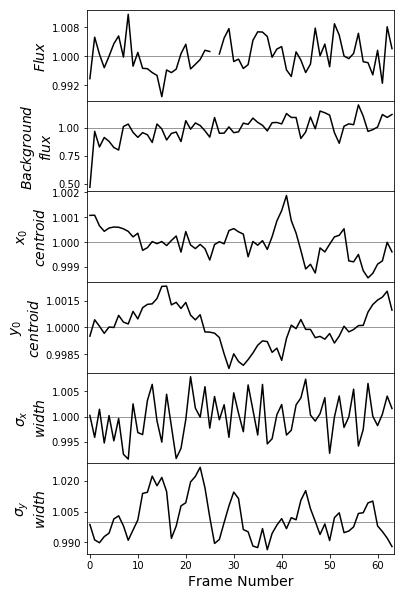

In [41]:
# plotting the first stack as sanity check

nb = np.arange(64)
fig, axes = plt.subplots(ncols=1, nrows=6, sharex=True, figsize=(5.5,10))

axes[0].axhline(y=1, color='k', alpha=0.4, linewidth=1)
axes[1].axhline(y=1, color='k', alpha=0.4, linewidth=1)
axes[2].axhline(y=1, color='k', alpha=0.4, linewidth=1)
axes[3].axhline(y=1, color='k', alpha=0.4, linewidth=1)
axes[4].axhline(y=1, color='k', alpha=0.4, linewidth=1)
axes[5].axhline(y=1, color='k', alpha=0.4, linewidth=1)

axes[0].plot(nb, flux_norm[:64] , 'k', mec ='b', marker='s', markevery=[],fillstyle='none')
axes[1].plot(nb, bg_flux_norm[:64]   , 'k', mec ='r', marker='s', markevery=[],fillstyle='none')
axes[2].plot(nb, xo_norm[:64], 'k', mec ='r', marker='s', markevery=[],fillstyle='none')
axes[3].plot(nb, yo_norm[:64], 'k', mec ='r', marker='s', markevery=[],fillstyle='none')
axes[4].plot(nb, xw_norm[:64], 'k', mec ='r', marker='s', markevery=[],fillstyle='none')
axes[5].plot(nb, yw_norm[:64], 'k', mec ='r', marker='s', markevery=[],fillstyle='none')

axes[0].yaxis.set_major_locator(MaxNLocator(4,prune='both'))
axes[1].yaxis.set_major_locator(MaxNLocator(4,prune='both'))
axes[2].yaxis.set_major_locator(MaxNLocator(4,prune='both'))
axes[3].yaxis.set_major_locator(MaxNLocator(4,prune='both'))
axes[4].yaxis.set_major_locator(MaxNLocator(4,prune='both'))
axes[5].yaxis.set_major_locator(MaxNLocator(4,prune='both'))

axes[0].set_ylabel('$Flux$', fontsize=14)
axes[1].set_ylabel('$Background$\n$flux$', fontsize=14, multialignment='center')
axes[2].set_ylabel('$x_0$\n$centroid$', fontsize=14, multialignment='center')
axes[3].set_ylabel('$y_0$\n$centroid$', fontsize=14, multialignment='center')
axes[4].set_ylabel('$\sigma _x$\n$width$', fontsize=14, multialignment='center')
axes[5].set_ylabel('$\sigma _y$\n$width$', fontsize=14, multialignment='center')

axes[0].ticklabel_format(useOffset=False)
axes[1].ticklabel_format(useOffset=False)
axes[2].ticklabel_format(useOffset=False)
axes[3].ticklabel_format(useOffset=False)
axes[4].ticklabel_format(useOffset=False)
axes[5].ticklabel_format(useOffset=False)

#axes[0].plot(nb,flux,color='k', mec ='b', marker='s', markevery=[0],fillstyle='none')

axes[5].set_xlim(-0.5,63.5)
axes[5].set_xlabel('Frame Number', fontsize=14)
fig.subplots_adjust(hspace=0)

# Check for leftover systematics 
per AOR

In [6]:
plt.close('all')